# Análise exploratória dos dados

### Tiago Tambonis - 02/11/19

#### Problemas com acentuação são esperados e a solução não foi tratada como prioridade

In [1]:
#Imports

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Carregar dados 

dados = pd.read_csv('../dataset.csv')

In [3]:
#Visualização - Carregamento OK

dados.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Visualização - Carregamento OK

dados.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#Checagem - shapes e colunas

print('Shapes: ', dados.shape)
print('Colunas: ', dados.columns)

('Shapes: ', (614, 13))
('Colunas: ', Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object'))


In [6]:
#Checagem - valores null

for _ in dados.columns:
    print("Numero de valores null no campo {}: == {}".format(_, dados[_].isnull().sum()))

Numero de valores null no campo Loan_ID: == 0
Numero de valores null no campo Gender: == 13
Numero de valores null no campo Married: == 3
Numero de valores null no campo Dependents: == 15
Numero de valores null no campo Education: == 0
Numero de valores null no campo Self_Employed: == 32
Numero de valores null no campo ApplicantIncome: == 0
Numero de valores null no campo CoapplicantIncome: == 0
Numero de valores null no campo LoanAmount: == 22
Numero de valores null no campo Loan_Amount_Term: == 14
Numero de valores null no campo Credit_History: == 50
Numero de valores null no campo Property_Area: == 0
Numero de valores null no campo Loan_Status: == 0


In [7]:
#Checagem - Valores únicos - Existem valores null, então é esperado que os campos com null tenham +1 de valores únicos

dados.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

## Análise dos valores das características

[]

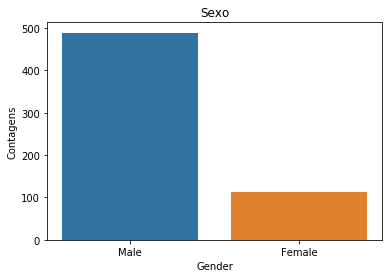

In [8]:
ax = sns.countplot(x="Gender", data=dados)
ax.set_title('Sexo')
ax.set_ylabel('Contagens')
ax.plot()

[]

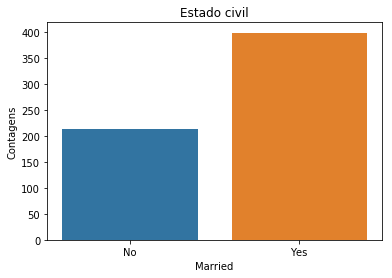

In [9]:
ax = sns.countplot(x="Married", data=dados)
ax.set_title('Estado civil')
ax.set_ylabel('Contagens')
ax.plot()

[]

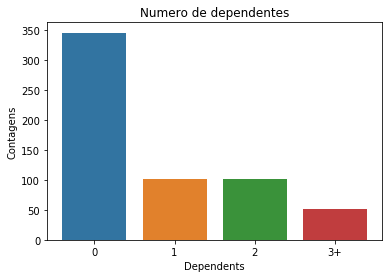

In [10]:
ax = sns.countplot(x="Dependents", data=dados)
ax.set_title('Numero de dependentes')
ax.set_ylabel('Contagens')
ax.plot()

[]

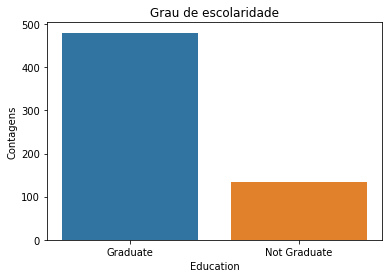

In [11]:
ax = sns.countplot(x="Education", data=dados)
ax.set_title('Grau de escolaridade')
ax.set_ylabel('Contagens')
ax.plot()

[]

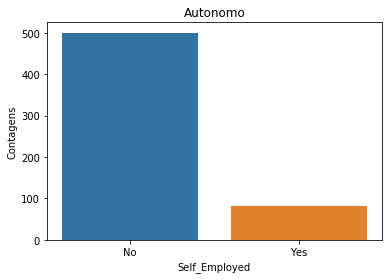

In [12]:
ax = sns.countplot(x="Self_Employed", data=dados)
ax.set_title('Autonomo')
ax.set_ylabel('Contagens')
ax.plot()

[]

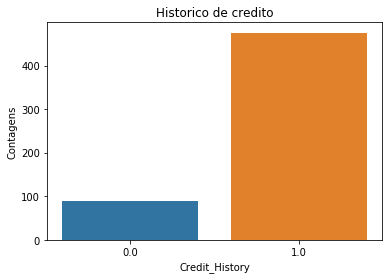

In [13]:
ax = sns.countplot(x="Credit_History", data=dados)
ax.set_title('Historico de credito')
ax.set_ylabel('Contagens')
ax.plot()

[]

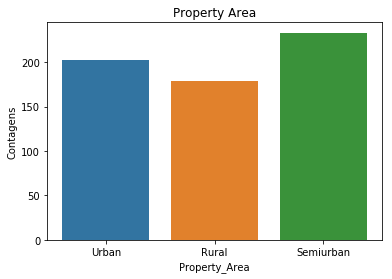

In [14]:
ax = sns.countplot(x="Property_Area", data=dados)
ax.set_title('Property Area')
ax.set_ylabel('Contagens')
ax.plot()

In [15]:
caracteristicas_plot = ['Gender', 'Married', 'Dependents', 'Education', 'Self_employed', 'Credit_History',
                       'Property_Area']

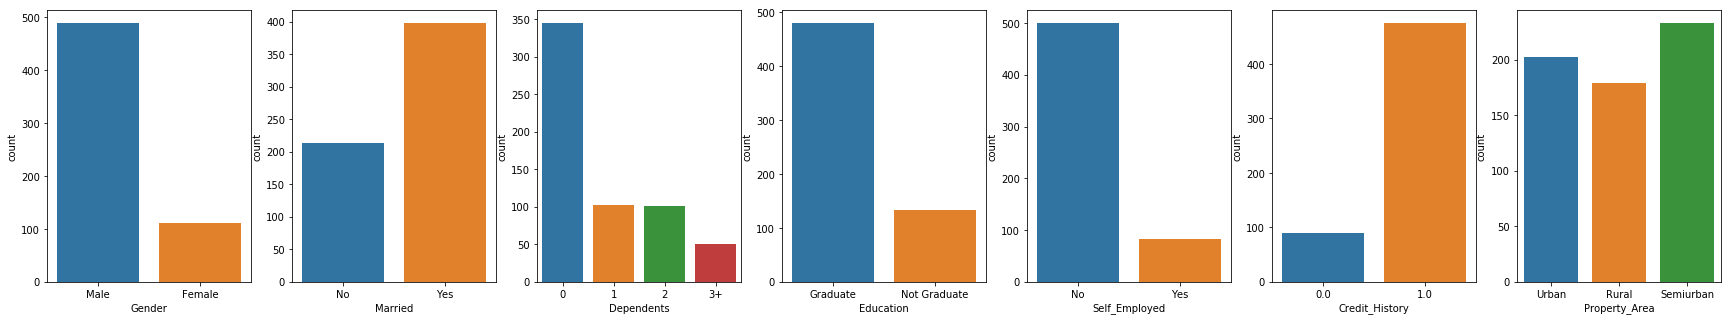

In [16]:
# Resumindo...

caracteristicas_plot = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History',
                       'Property_Area']

fig, axs = plt.subplots(ncols=len(caracteristicas_plot), figsize=(30, 5))
j=0
for i in caracteristicas_plot:
    ax = sns.countplot(x=i, data=dados, ax=axs[j])
    j = j +1

## Conclusões

Número de requerentes do sexo masculino é maior;

Número de requerentes casados é maior;

Número de requerentes sem dependentes é maior;

Número de requerentes graduados é maior;

Número de requerentes autônomos é menor; 

Número de requerentes aprovados com histórico positivo é maior; 

Localização é consideravelmente bem distribuída.

# Comportamento das características associado a aprovação de crédito

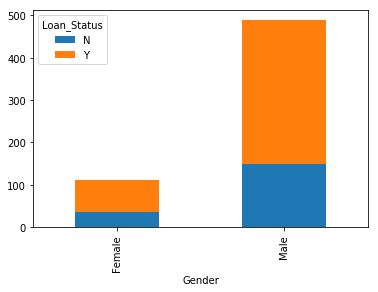

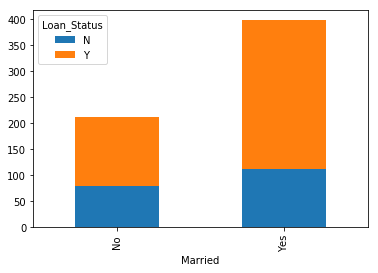

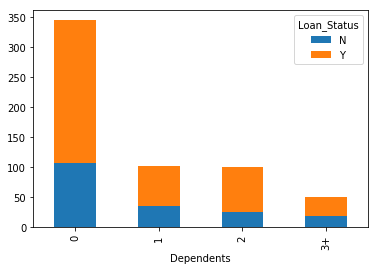

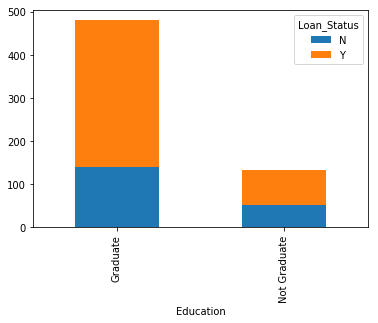

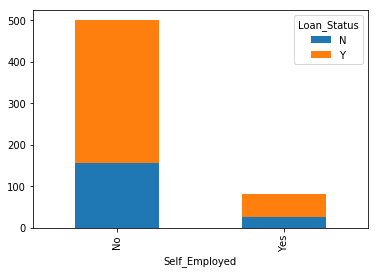

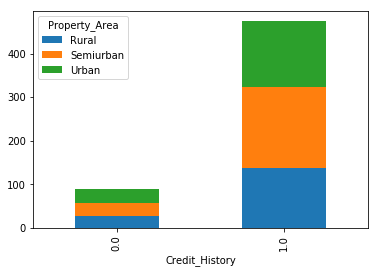

In [17]:
ct = pd.crosstab(dados.Gender, dados.Loan_Status)
ct.plot(kind='bar', stacked=True)

ct = pd.crosstab(dados.Married, dados.Loan_Status)
ct.plot(kind='bar', stacked=True)

ct = pd.crosstab(dados.Dependents, dados.Loan_Status)
ct.plot(kind='bar', stacked=True)

ct = pd.crosstab(dados.Education, dados.Loan_Status)
ct.plot(kind='bar', stacked=True)

ct = pd.crosstab(dados.Self_Employed, dados.Loan_Status)
ct.plot(kind='bar', stacked=True)

ct = pd.crosstab(dados.Credit_History, dados.Property_Area)
ct.plot(kind='bar', stacked=True)

# Conclusões 

Homens possuem maior número de empréstimo quitado. Isso era esperado já que homens requerem mais. 

Pessoas casadas possuem maior número de empréstimo quitado. Isso também era esperado já que elas requerem mais 
empréstimo.

Pessoas sem dependentes tem maior número de empréstimo quitado e a observação feita anteriormente também vale aqui.

Pessoas graduadas tem maior número de empréstimo quitado e a observação feita anteriormente também vale aqui.

Pessoas autonomas tem maior número de empréstimo quitado e a observação feita anteriormente também vale aqui.

Assim como na análise anterior, a localização parece não contribuir muito com análise exploratória.

# Conclusões gerais

É possível extrair alguns informações da análise exploratória. Porém, infelizmente, nada de muito concreto associado com o Loan_status.